In [62]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('data\\train.csv')
df_test = pd.read_csv('data\\test.csv')

In [63]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

### Count Plot으로 Age에 따른 생존여부 히스토그램 그리기

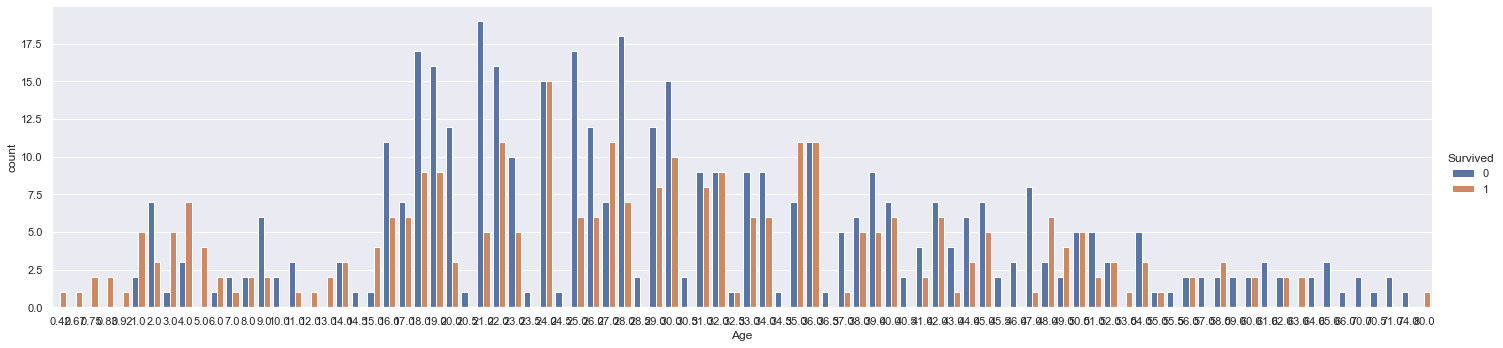

In [64]:
sns.catplot(data=df_train, x ='Age', hue='Survived',kind='count',aspect=4)
# 가운데 나이대가 많이 죽었다.

### kdeplot을 사용하여 매끄러운 곡선 분포도 얻기

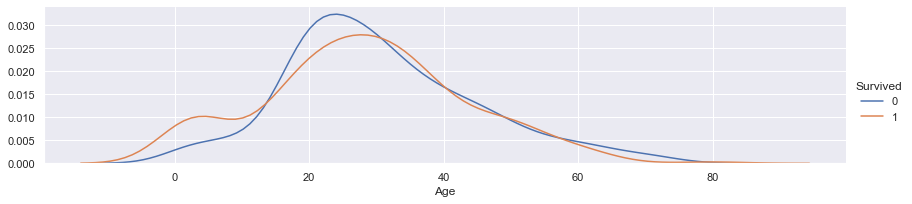

In [65]:
# kernal density plot: 높을수록 밀집, 낮을수록 희소
facet = sns.FacetGrid(df_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age')
facet.add_legend()

plt.show()

### 빈칸(NAN) 처리하기

In [66]:
df_train[['Name','Age']].head(10)

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
7,"Palsson, Master. Gosta Leonard",2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0


In [67]:
# 이름에 들어가는 Mr. Mrs. Miss. 타이틀 정보 기준의 평균값 넣기 -> 이름 변환
df_train.loc[df_train['Name'].str.contains('Mr\.'),'Name'] = 'Mr'
df_train.loc[df_train['Name'].str.contains('Mrs\.'),'Name'] = 'Mrs'
df_train.loc[df_train['Name'].str.contains('Miss\.'),'Name'] = 'Miss'
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# 이름에 들어가는 Mr. Mrs. Miss. 타이틀 정보 기준의 평균값 넣기 -> 값 채우기
df_train['Name'] = df_train['Name'].map({
    'Mr': 0,
    'Mrs': 1,
    'Miss': 2,
})
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.0,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2.0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,0.0,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,0.0,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,NaN,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,1.0,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,1.0,female,14.0,1,0,237736,30.0708,NaN,C


In [71]:
df_train['Name'] = df_train['Name'].fillna(3)
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.0,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2.0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,0.0,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,0.0,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,3.0,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,1.0,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,1.0,female,14.0,1,0,237736,30.0708,NaN,C


In [72]:
df_train['Name'].value_counts()

0.0    517
2.0    182
1.0    125
3.0     67
Name: Name, dtype: int64

In [75]:
df_train['Age'] = df_train['Age'].fillna(df_train.groupby('Name')['Age'].transform('mean'))
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1.0,female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2.0,female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1.0,female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,male,35.00000,0,0,373450,8.0500,NaN,S
5,6,0,3,0.0,male,32.36809,0,0,330877,8.4583,NaN,Q
6,7,0,1,0.0,male,54.00000,0,0,17463,51.8625,E46,S
7,8,0,3,3.0,male,2.00000,3,1,349909,21.0750,NaN,S
8,9,1,3,1.0,female,27.00000,0,2,347742,11.1333,NaN,S
9,10,1,2,1.0,female,14.00000,1,0,237736,30.0708,NaN,C


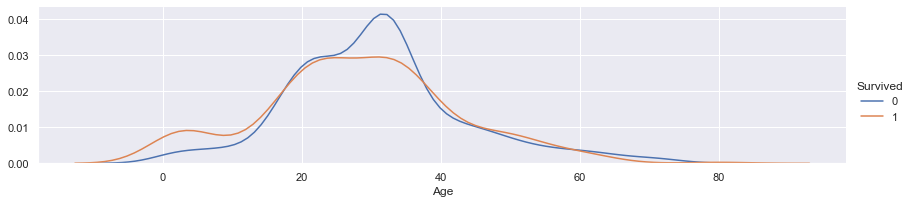

In [76]:
# kernal density plot: 높을수록 밀집, 낮을수록 희소
facet = sns.FacetGrid(df_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age')
facet.add_legend()

plt.show()